In [1]:
import os

imdb_dir = '/notebooks/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

print(len(labels))
print(len(texts))

25000
25000


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [3]:
glove_dir = '/storage'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [4]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

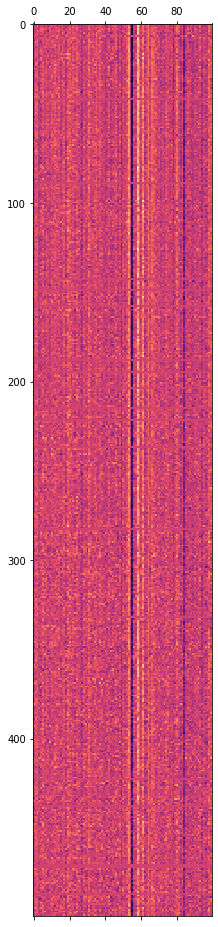

In [5]:
import matplotlib.pyplot as plt

plt.matshow(embedding_matrix[:500], cmap='magma')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 3s 197ms/step - loss: 1.9122 - acc: 0.4587 - val_loss: 0.7304 - val_acc: 0.5168
Epoch 2/10
7/7 [==============================] - 1s 127ms/step - loss: 0.4823 - acc: 0.7929 - val_loss: 1.2662 - val_acc: 0.5093
Epoch 3/10
7/7 [==============================] - 1s 132ms/step - loss: 0.4944 - acc: 0.7096 - val_loss: 0.8468 - val_acc: 0.4908
Epoch 4/10
7/7 [==============================] - 1s 133ms/step - loss: 0.3778 - acc: 0.8633 - val_loss: 0.7020 - val_acc: 0.5624
Epoch 5/10
7/7 [==============================] - 1s 130ms/step - loss: 0.2216 - acc: 0.9568 - val_loss: 0.7045 - val_acc: 0.5597
Epoch 6/10
7/7 [==============================] - 1s 148ms/step - loss: 0.1148 - acc: 1.0000 - val_loss: 1.1396 - val_acc: 0.5179
Epoch 7/10
7/7 [==============================] - 1s 126ms/step - loss: 0.1607 - acc: 0.9890 - val_loss: 0.8017 - val_acc: 0.5569
Epoch 8/10
7/7 [==============================] - 1s 131ms/step - loss: 0.0538 - acc: 1.00

In [8]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 177ms/step - loss: 0.6923 - acc: 0.5311 - val_loss: 0.6919 - val_acc: 0.5231
Epoch 2/10
7/7 [==============================] - 1s 137ms/step - loss: 0.4947 - acc: 0.9891 - val_loss: 0.7095 - val_acc: 0.5196
Epoch 3/10
7/7 [==============================] - 1s 166ms/step - loss: 0.3025 - acc: 1.0000 - val_loss: 0.7140 - val_acc: 0.5155
Epoch 4/10
7/7 [==============================] - 1s 127ms/step - loss: 0.1317 - acc: 1.0000 - val_loss: 0.7478 - val_acc: 0.5193
Epoch 5/10
7/7 [==============================] - 1s 131ms/step - loss: 0.0653 - acc: 1.0000 - val_loss: 0.7104 - val_acc: 0.5275
Epoch 6/10
7/7 [==============================] - 1s 136ms/step - loss: 0.0330 - acc: 1.0000 - val_loss: 0.7300 - val_acc: 0.5236
Epoch 7/10
7/7 [==============================] - 1s 131ms/step - loss: 0.0166 - acc: 1.0000 - val_loss: 0.7371 - val_acc: 0.5229
Epoch 8/10
7/7 [==============================] - 1s 144ms/step - loss: 0.0104 - acc: 1.00

In [10]:
from tensorflow.keras.layers import LSTM

max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

NameError: name 'input_train' is not defined